# Optimization of the Rastrigin test function

The Rastrigin function is defined by:

$$
f(\mathbf{x}) = A + \sum_{i=1}^n \left[x_i^2 - A\cos(2 \pi x_i)\right]
$$
where $A=10$ and $\mathbf{x}\in[-5.12,5.12]^n$. 

It has a global minimum at $\mathbf{x} = \mathbf{0}$ where $f(\mathbf{x})=0$.

This function has several local minimas. This is why we use the `Multistart` algorithm. In our example, we consider the bidimensional case, i.e. $n=2$.

*Reference*:

* Rastrigin, L. A. "Systems of extremal control." Mir, Moscow (1974).
* G. Rudolph. "Globale Optimierung mit parallelen Evolutionsstrategien". Diplomarbeit. Department of Computer Science, University of Dortmund, July 1990.

## Definition of the problem

In [1]:
import openturns as ot
import numpy as np

In [2]:
def rastriginPy(X):
    A = 10.0
    delta = [x**2 - A * np.cos(2 * np.pi * x) for x in X]
    y = A + sum(delta)
    return [y]

In [3]:
rastriginPy([1.0, 1.0])

[-8.0]

In [4]:
dim = 2

In [5]:
rastrigin = ot.PythonFunction(dim, 1, rastriginPy)

In [6]:
lowerbound = [-5.12] * dim
upperbound = [5.12] * dim
bounds = ot.Interval(lowerbound, upperbound)

In [7]:
xexact = [0.0] * dim

## Plot the iso-values of the objective function

In [8]:
rastrigin = ot.MemoizeFunction(rastrigin)

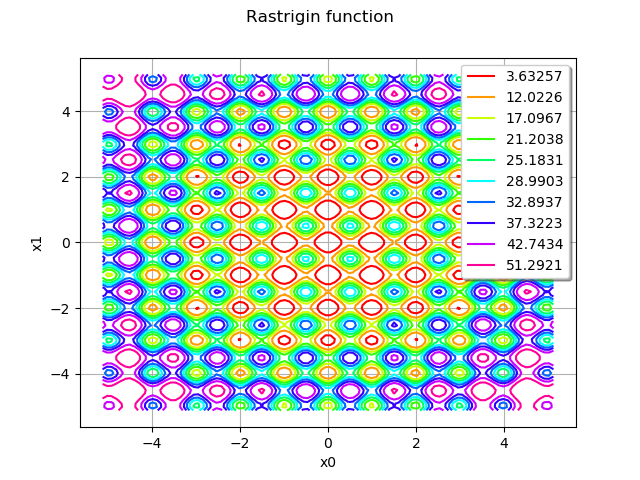

In [9]:
graph = rastrigin.draw(lowerbound, upperbound, [100]*dim)
graph.setTitle("Rastrigin function")
graph

We see that the Rastrigin function has several local minimas. However, there is only one single global minimum at $\mathbf{x}^\star=(0, 0)$.

## Define the starting points

The starting points are computed from `Uniform` distributions in the input domain. We consider a set of 100 starting points. 

In [10]:
U = ot.Uniform(-5.12, 5.12)
distribution = ot.ComposedDistribution([U]*dim)

In [11]:
size = 100
startingPoints = distribution.getSample(size)

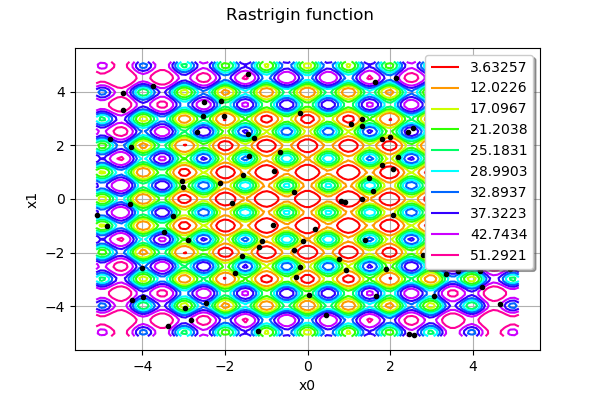

In [12]:
graph = rastrigin.draw(lowerbound, upperbound, [100]*dim)
graph.setTitle("Rastrigin function")
cloud = ot.Cloud(startingPoints)
cloud.setPointStyle("bullet")
cloud.setColor("black")
graph.add(cloud)
graph

We see that the starting points are randomly chosen in the input domain of the function. 

## Create and solve the optimization problem

In [13]:
problem = ot.OptimizationProblem(rastrigin)
problem.setBounds(bounds)

In [14]:
solver = ot.TNC(problem)

In [15]:
algo = ot.MultiStart(solver, startingPoints)
algo.run()
result = algo.getResult()

In [16]:
xoptim = result.getOptimalPoint()
xoptim

class=Point name=Unnamed dimension=2 values=[-2.40017e-13,4.84564e-10]

In [17]:
xexact

[0.0, 0.0]

We can see that the solver found a very accurate approximation of the exact solution. 

In [18]:
result.getEvaluationNumber()

17

In [19]:
inputSample = result.getInputSample()

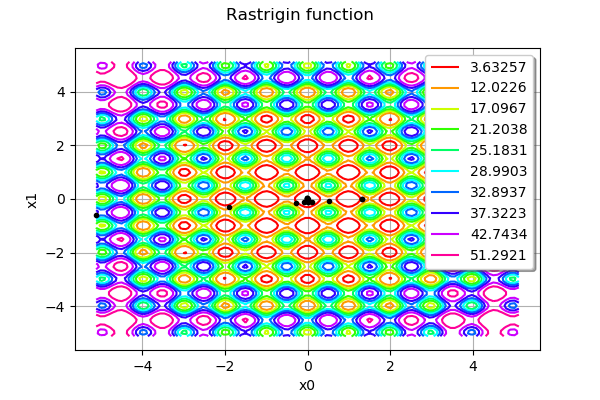

In [20]:
graph = rastrigin.draw(lowerbound, upperbound, [100]*dim)
graph.setTitle("Rastrigin function")
cloud = ot.Cloud(inputSample)
cloud.setPointStyle("bullet")
cloud.setColor("black")
graph.add(cloud)
graph

We see that the algorithm evaluated the function more often in the neighbourhood of the solution. 

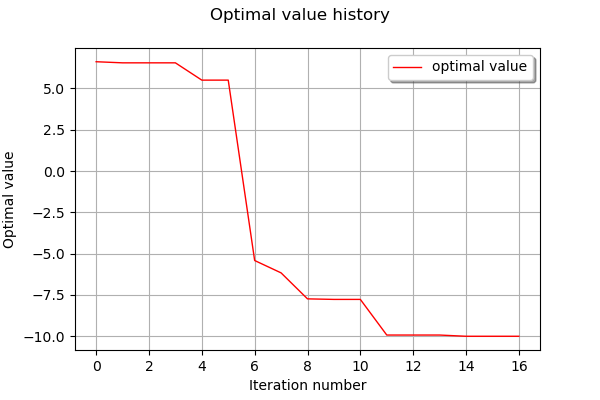

In [21]:
result.drawOptimalValueHistory()

In [22]:
rastrigin.getEvaluationCallsNumber()

54

In order to see where the `rastrigin` function was evaluated, we use the `getInputHistory` method. 

In [23]:
inputSample = rastrigin.getInputHistory()

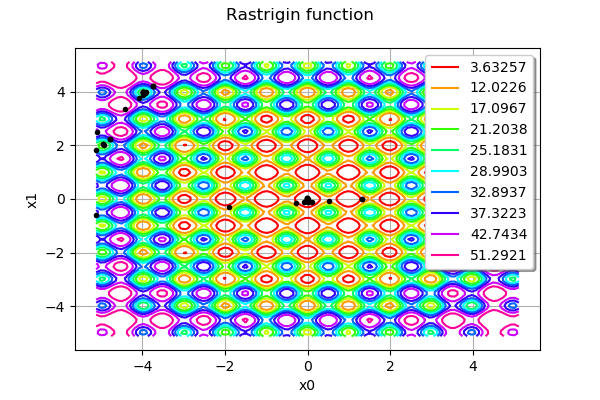

In [24]:
graph = rastrigin.draw(lowerbound, upperbound, [100]*dim)
graph.setTitle("Rastrigin function")
cloud = ot.Cloud(inputSample)
cloud.setPointStyle("bullet")
cloud.setColor("black")
graph.add(cloud)
graph

We see that the algorithm explored different regions of the space before finding the global minimum. 